#Recognition of Top 10 Bank Brands in Vietnam using CNN Algorithm

In [ ]:
#1 Khai báo thư viện cần sử dụng
from os import listdir
from numpy import asarray, save
from keras.utils import load_img
from keras.utils import img_to_array
import numpy as np

In [ ]:
#2 Kết nối Google Drive đọc & lưu dữ liệu
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#3 Khai báo thư mục chứa ảnh dữ liệu
#Gán nhãn dữ liệu (tên file tương ứng)

from os import listdir
from numpy import asarray
folder = '/content/drive/MyDrive/Bank/Data/'
photos, labels = list(), list()
for file in listdir(folder):
  output = 0.0
  if file.startswith('ACB'):
    output = 0
  if file.startswith('TCB'):
    output = 1
  if file.startswith('VCB'):
    output = 2
  if file.startswith('VIB'):
    output = 3
  if file.startswith('VPB'):
    output = 4  
  if file.startswith('MBB'):
    output = 5
  if file.startswith('VTB'):
    output = 6
  if file.startswith('BIDV'):
    output = 7
  if file.startswith('AGB'):
    output = 8
  if file.startswith('MSB'):
    output = 9  

  photo =load_img(folder + file, target_size=(224,224))
  photo =img_to_array(photo)
  photos.append(photo)
  labels.append(output)

photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)
save('/content/drive/MyDrive/Bank/Bank_photos.npy', photos)
save('/content/drive/MyDrive/Bank/Bank_labels.npy', labels)

(130, 224, 224, 3) (130,)


In [ ]:
import numpy as np

# Load images and labels
from keras.utils import to_categorical #one hot encoding
photos = np.load('/content/drive/MyDrive/Bank/Bank_photos.npy')
labels = np.load('/content/drive/MyDrive/Bank/Bank_labels.npy')
labels_one_hot = to_categorical(labels)

from sklearn.model_selection import train_test_split
x_trains, x_tests, y_trains, y_tests = train_test_split(photos, labels_one_hot, test_size = 0.3, random_state = 100)

In [ ]:
#Build model
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Normalization
from keras.layers import ReLU
from keras.optimizers import Adam
from keras.optimizers import RMSprop

classes = 10
model = Sequential()

#Xây dựng các lớp CNN
#CNN1 kết nối đầu vào - mô tả thông tin đầu vào
#Conv2D - phương thức tạo ra phức hợp - số bộ lọc/kích thước bộ lọc
#relu - chuyển value âm về 0, giữ nguyên giá trị dương
#MaxPooling2D - resize kích thước dữ liệu, đảm bảo các thuộc tính quan trọng
model.add(Conv2D(32, kernel_size= (3,3), activation= 'relu', input_shape= (224,224, 3), padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

model.add(Conv2D(64, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

model.add(Conv2D(128, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(Conv2D(128, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

model.add(Conv2D(256, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(Conv2D(256, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

#Fully connected layers - Dense
#Flatten - ảnh ma trận về ảnh 1 chiều
model.add(Flatten())
model.add(Dense(512, activation= 'relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation= 'relu'))
model.add(Dropout(0.2))
model.add(Dense(classes, activation= 'softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 56, 56, 128)       73856     
                                                                 
 conv2d_9 (Conv2D)           (None, 56, 56, 128)      

In [ ]:
#Tăng cường thêm data - ImageDataGenerator
#rescale=1./255 chuẩn hoá dữ liệu ảnh, cải thiện tốc độ xử lý
from keras.preprocessing.image import ImageDataGenerator
aug = ImageDataGenerator(rotation_range=20, zoom_range=0.1,
    rescale=1./255,
	width_shift_range=0.1,
    height_shift_range=0.1,
	horizontal_flip=True,
    brightness_range=[0.2,1.5], fill_mode="nearest")

In [ ]:
#Loss - value học được/ value thực tế
#Accurency - độ chính xác của mô hình
from keras.backend import categorical_crossentropy
model.compile(loss='categorical_crossentropy', optimizer = Adam(), metrics=['accuracy'])
train = model.fit(aug.flow(x_trains, y_trains, batch_size=32),
                               epochs = 50)
test_loss, test_acc = model.evaluate(x_tests,y_tests)
print("Accurency:", test_acc)
print('Loss:', test_loss)

Epoch 1/50
3/3 [==============================] - 18s 5s/step - loss: 2.3546 - accuracy: 0.0769
Epoch 2/50
3/3 [==============================] - 21s 6s/step - loss: 2.2974 - accuracy: 0.1648
Epoch 3/50
3/3 [==============================] - 18s 5s/step - loss: 2.2999 - accuracy: 0.1429
Epoch 4/50
3/3 [==============================] - 17s 5s/step - loss: 2.2889 - accuracy: 0.1538
Epoch 5/50
3/3 [==============================] - 16s 5s/step - loss: 2.2701 - accuracy: 0.1099
Epoch 6/50
3/3 [==============================] - 19s 6s/step - loss: 2.1780 - accuracy: 0.1648
Epoch 7/50
3/3 [==============================] - 17s 5s/step - loss: 2.1145 - accuracy: 0.1758
Epoch 8/50
3/3 [==============================] - 16s 6s/step - loss: 2.0731 - accuracy: 0.1868
Epoch 9/50
3/3 [==============================] - 17s 6s/step - loss: 2.0554 - accuracy: 0.2527
Epoch 10/50
3/3 [==============================] - 16s 5s/step - loss: 1.9943 - accuracy: 0.2198
Epoch 11/50
3/3 [======================

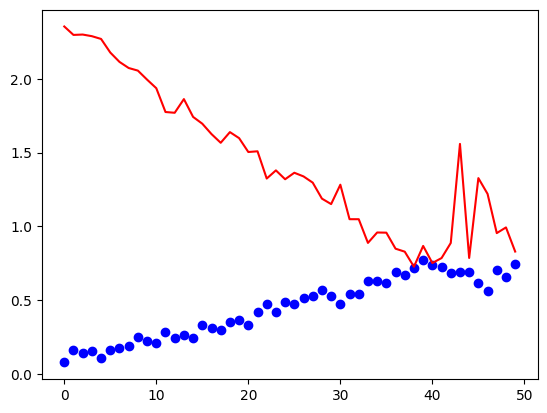

In [ ]:
from matplotlib import pyplot as plt
accuracy= train.history['accuracy']
loss= train.history['loss']
epochs= range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label= 'Training accuracy')
plt.plot(epochs, loss, 'r', label= 'Training loss')
plt.show()

In [ ]:
train = model.fit(aug.flow(x_trains, y_trains, batch_size=32),
                               epochs = 30)
test_loss, test_acc = model.evaluate(x_tests,y_tests)
print("Accurency:", test_acc)
print('Loss:', test_loss)

Epoch 1/30
3/3 [==============================] - 17s 6s/step - loss: 0.7893 - accuracy: 0.7253
Epoch 2/30
3/3 [==============================] - 16s 5s/step - loss: 0.6594 - accuracy: 0.7143
Epoch 3/30
3/3 [==============================] - 19s 6s/step - loss: 0.9519 - accuracy: 0.5934
Epoch 4/30
3/3 [==============================] - 17s 5s/step - loss: 0.9693 - accuracy: 0.6593
Epoch 5/30
3/3 [==============================] - 18s 5s/step - loss: 0.8499 - accuracy: 0.6813
Epoch 6/30
3/3 [==============================] - 17s 5s/step - loss: 0.7488 - accuracy: 0.7473
Epoch 7/30
3/3 [==============================] - 16s 5s/step - loss: 0.6686 - accuracy: 0.8022
Epoch 8/30
3/3 [==============================] - 17s 5s/step - loss: 0.6185 - accuracy: 0.8242
Epoch 9/30
3/3 [==============================] - 18s 6s/step - loss: 0.4775 - accuracy: 0.8352
Epoch 10/30
3/3 [==============================] - 16s 6s/step - loss: 0.4880 - accuracy: 0.8132
Epoch 11/30
3/3 [======================

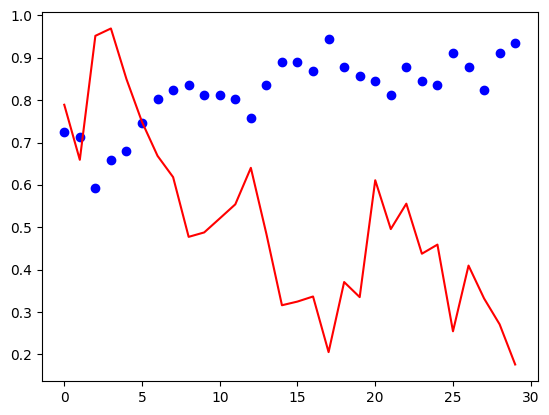

In [ ]:
from matplotlib import pyplot as plt
accuracy= train.history['accuracy']
loss= train.history['loss']
epochs= range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label= 'Training accuracy')
plt.plot(epochs, loss, 'r', label= 'Training loss')
plt.show()

In [ ]:
train = model.fit(aug.flow(x_trains, y_trains, batch_size=32),
                               epochs = 10)
test_loss, test_acc = model.evaluate(x_tests,y_tests)
print("Accurency:", test_acc)
print('Loss:', test_loss)

Epoch 1/10
3/3 [==============================] - 20s 7s/step - loss: 0.3482 - accuracy: 0.9121
Epoch 2/10
3/3 [==============================] - 24s 8s/step - loss: 0.4187 - accuracy: 0.8242
Epoch 3/10
3/3 [==============================] - 23s 8s/step - loss: 0.3537 - accuracy: 0.8352
Epoch 4/10
3/3 [==============================] - 19s 6s/step - loss: 0.4152 - accuracy: 0.8022
Epoch 5/10
3/3 [==============================] - 21s 5s/step - loss: 0.3628 - accuracy: 0.8462
Epoch 6/10
3/3 [==============================] - 19s 6s/step - loss: 0.2834 - accuracy: 0.9121
Epoch 7/10
3/3 [==============================] - 17s 5s/step - loss: 0.3277 - accuracy: 0.8681
Epoch 8/10
3/3 [==============================] - 17s 5s/step - loss: 0.2317 - accuracy: 0.9231
Epoch 9/10
3/3 [==============================] - 18s 6s/step - loss: 0.2076 - accuracy: 0.8901
Epoch 10/10
2/2 [==============================] - 2s 330ms/step - loss: 623.2511 - accuracy: 0.3590
Accurency: 0.3589743673801422
Loss:

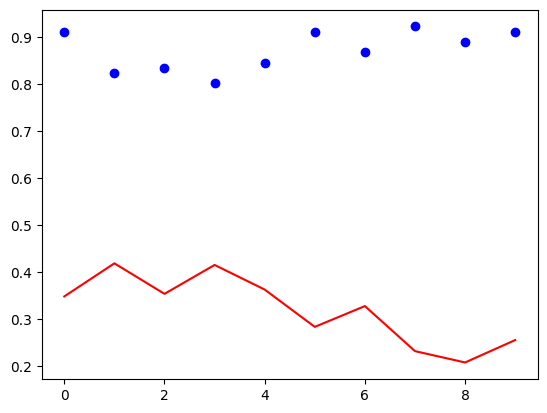

In [ ]:
from matplotlib import pyplot as plt
accuracy= train.history['accuracy']
loss= train.history['loss']
epochs= range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label= 'Training accuracy')
plt.plot(epochs, loss, 'r', label= 'Training loss')
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/Bank/Bank.h5')

In [ ]:
from keras.models import load_model
model = load_model('/content/drive/MyDrive/Bank/Bank.h5')

In [ ]:
from PIL import Image
import numpy as np
import os

#Tạo mảng để chứa label
label = np.array(['ACB | Ngân hàng của mọi nhà', 
                  'TCB - Techcombank | Giữ trọn niềm tin', 
                  'VCB - Vietcombank | Together for the future', 
                  'VIB | The heart of banking', 
                  'VPB - VPBank | Hành động vì ước mơ của bạn', 
                  'MBB - MBBank | Hành động vì ước mơ của bạn', 
                  'VTB - Vietinbank | Nâng giá trị cuộc sống', 
                  'BIDV | Hợp tác đồng hành phát triển', 
                  'AGB - Agribank | Mang phồn thịnh đến với khách hàng', 
                  'MSB | Tạo lập giá trị bền vững'])


# Kích thước mới của ảnh
new_size = (300, 300)
predict_size = (224, 224)

# Đường dẫn đến thư mục chứa ảnh trong Drive
path = '/content/drive/MyDrive/Bank/Test_Data/1'
images = os.listdir(path)

# Đọc ảnh từ thư mục trên Drive và hiển thị chúng trên Colab
for image_name in images:
    # Đường dẫn đến file ảnh
    img_path = os.path.join(path, image_name)
    # Đọc ảnh
    if os.path.isfile(img_path):
      # Đọc ảnh
      img = Image.open(img_path)
      img_origin = Image.open(img_path)

      # Resize ảnh về kích thước mới
      img_origin = img.resize(new_size)
      img_origin.show()

      #Dự đoán
      img = img.resize(predict_size)
      img = img_to_array(img)
      img = img.reshape(1,224,224,3)
      img = img.astype('float32')/255
      max = np.argmax(model.predict(img), axis = 1)
      print(label[max])

Output hidden; open in https://colab.research.google.com to view.